In [2]:
# directed txt to undirected mtx

input_file = './datasets/roadNet-PA.txt'  
output_file = './datasets/roadNet-PA.mtx' 

edges = []

unique_nodes = set()

with open(input_file, 'r') as f:
    for line in f:
        left, right = map(int, line.split())
        if left > right:
            edges.append((left, right))
            unique_nodes.add(left)
            unique_nodes.add(right)

node_map = {node: idx for idx, node in enumerate(sorted(unique_nodes))}

converted_edges = [(node_map[left], node_map[right]) for left, right in edges]

converted_edges.sort()

with open(output_file, 'w') as f:
    for left, right in converted_edges:
        f.write(f"{left+1} {right+1}\n") 

   outdeg1  indeg1  totaldeg1  outdeg2  indeg2  totaldeg2  totaldeg
0      1.0     0.0        1.0      0.0     0.0        0.0       1.0
1      0.0     1.0        1.0      0.0     0.0        0.0       1.0
2      1.0     0.0        1.0      0.0     0.0        0.0       1.0
3      1.0     0.0        1.0      0.0     0.0        0.0       1.0
4      0.0     1.0        1.0      0.0     0.0        0.0       1.0


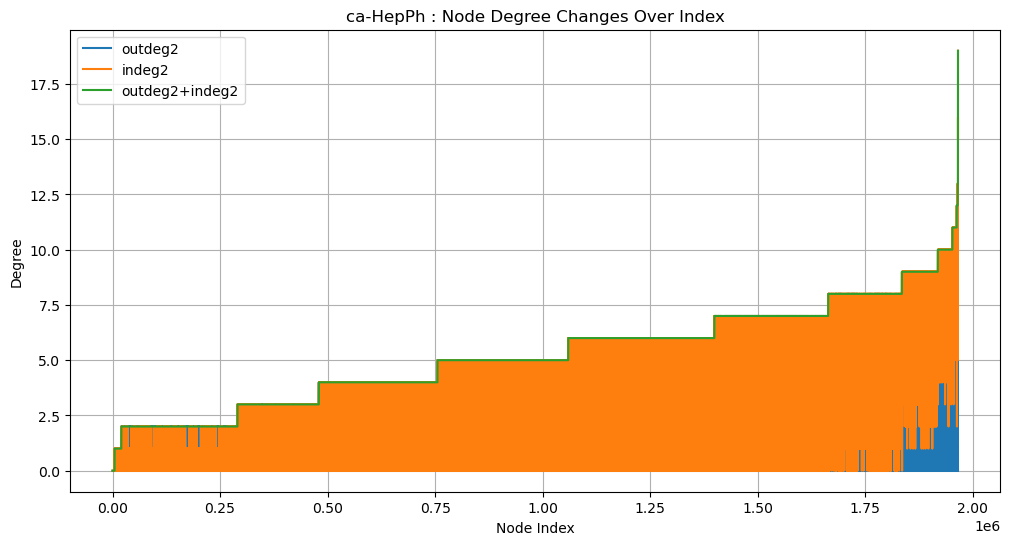

In [3]:
# degree distribution

import pandas as pd
import matplotlib.pyplot as plt

# txt 파일에서 데이터 읽기
file_path = './degree/roadNet-CA.txt'
with open(file_path, 'r') as file:
    header = file.readline().strip().split()  
    data = file.readlines()  

df = pd.DataFrame([line.strip().split() for line in data], columns=header)

df = df.astype(float)

#df['outdeg2_times_indeg2'] = df['outdeg2'] * df['indeg2']

print(df.head())

plt.figure(figsize=(12, 6))

column_list = ['outdeg2', 'indeg2']
for col in column_list:
    plt.plot(df.index, df[col], label=col)
plt.plot(df.index, df[column_list[0]] + df[column_list[1]], label="outdeg2+indeg2")

plt.xlabel('Node Index')
plt.ylabel('Degree')
plt.title('ca-HepPh : Node Degree Changes Over Index')
plt.legend()
#plt.yscale('log')
plt.grid(True)
plt.show()